In [1]:
import os

# Check the list of dataset
os.listdir('/aiffel/data/data/bike-sharing-demand')

['train.csv', 'test.csv', 'sampleSubmission.csv']

In [2]:
import pandas as pd

# Read data
train_data = pd.read_csv('/aiffel/data/data/bike-sharing-demand/train.csv')
test_data = pd.read_csv('/aiffel/data/data/bike-sharing-demand/test.csv')
test_data_y = pd.read_csv('/aiffel/data/data/bike-sharing-demand/sampleSubmission.csv')

In [3]:
# Check the details of dataset
print(type(train_data))
print(train_data.shape)
print(train_data.head())

print(test_data.shape)
print(test_data.head())

print(test_data_y.shape)
print(test_data_y.head())

<class 'pandas.core.frame.DataFrame'>
(10886, 12)
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
(6493, 9)
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1

In [4]:
# Add columns using datatime column
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

train_data['year'] = train_data['datetime'].apply(lambda x: x.year)
train_data['month'] = train_data['datetime'].apply(lambda x: x.month)
train_data['day'] = train_data['datetime'].apply(lambda x: x.day)
train_data['hour'] = train_data['datetime'].apply(lambda x: x.hour)
train_data['min'] = train_data['datetime'].apply(lambda x: x.minute)
train_data['sec'] = train_data['datetime'].apply(lambda x: x.second)


# Add columns using datatime column
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

test_data['year'] = test_data['datetime'].apply(lambda x: x.year)
test_data['month'] = test_data['datetime'].apply(lambda x: x.month)
test_data['day'] = test_data['datetime'].apply(lambda x: x.day)
test_data['hour'] = test_data['datetime'].apply(lambda x: x.hour)
test_data['min'] = test_data['datetime'].apply(lambda x: x.minute)
test_data['sec'] = test_data['datetime'].apply(lambda x: x.second)

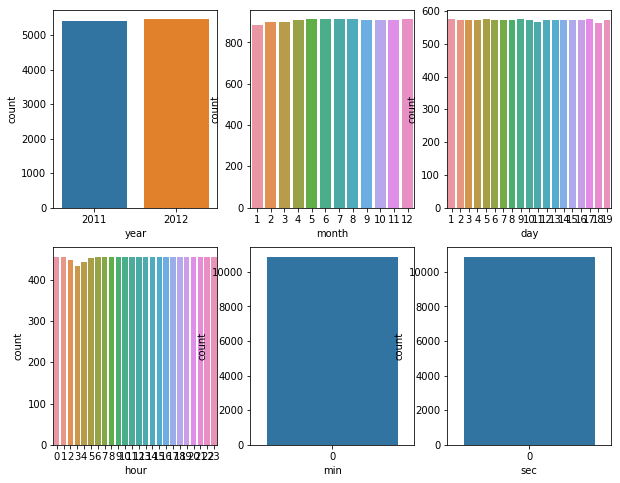

In [5]:
# Visualization of data columns data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

axes = axes.flatten()

plot_list = ['year', 'month', 'day', 'hour', 'min', 'sec']

for i in range(len(axes)):
    sns.countplot(data=train_data, x=plot_list[i], ax=axes[i])

In [6]:
#one-hot encoding
train_data = pd.get_dummies(train_data, columns=['weather'], prefix='weather')
test_data = pd.get_dummies(test_data, columns=['weather'], prefix='weather')

train_data = pd.get_dummies(train_data, columns=['season'], prefix='season')
test_data = pd.get_dummies(test_data, columns=['season'], prefix='season')

# check the data
print(train_data.head())
print(test_data.head())

             datetime  holiday  workingday  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00        0           0  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00        0           0  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00        0           0  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00        0           0  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00        0           0  9.84  14.395        75        0.0   

   casual  registered  count  ...  min  sec  weather_1  weather_2  weather_3  \
0       3          13     16  ...    0    0          1          0          0   
1       8          32     40  ...    0    0          1          0          0   
2       5          27     32  ...    0    0          1          0          0   
3       3          10     13  ...    0    0          1          0          0   
4       0           1      1  ...    0    0          1          0          0   

   weather_4  season_1  season_2

In [7]:
# dropout columns
train_data = train_data.drop(['year','min','sec','datetime', 'casual', 'registered'], axis=1)
test_data = test_data.drop(['year','min','sec','datetime'], axis=1)

# check the data
print(train_data.head())
print(test_data.head())

   holiday  workingday  temp   atemp  humidity  windspeed  count  month  day  \
0        0           0  9.84  14.395        81        0.0     16      1    1   
1        0           0  9.02  13.635        80        0.0     40      1    1   
2        0           0  9.02  13.635        80        0.0     32      1    1   
3        0           0  9.84  14.395        75        0.0     13      1    1   
4        0           0  9.84  14.395        75        0.0      1      1    1   

   hour  weather_1  weather_2  weather_3  weather_4  season_1  season_2  \
0     0          1          0          0          0         1         0   
1     1          1          0          0          0         1         0   
2     2          1          0          0          0         1         0   
3     3          1          0          0          0         1         0   
4     4          1          0          0          0         1         0   

   season_3  season_4  
0         0         0  
1         0         

In [8]:
# set count column - labeling
# set X_train
y = train_data['count'].values
X = train_data.drop(['count'], axis=1).values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions.shape)

(2722,)


In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5
print(f"MSE : {mse:.3f} / RMSE : {rmse:.3f}")

MSE : 21517.406 / RMSE : 146.688


(8164, 17)
(8164,)
(2722,)


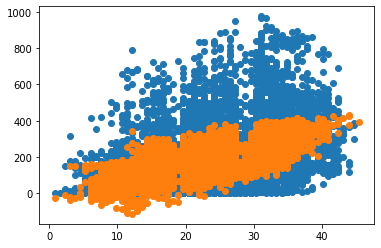

In [29]:
print(X_train.shape)
print(y_train.shape)
print(predictions.shape)

#data visualization
plt.scatter(X_train[:, 3], y_train, label='true' )
plt.scatter(X_test[:, 3], predictions, label='pred')



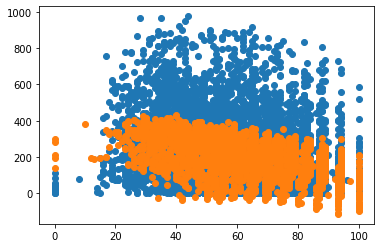

In [30]:
#data visualization
plt.scatter(X_train[:, 4], y_train, label='true')
plt.scatter(X_test[:, 4], predictions, label='pred')